In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv("PISA2015-forStage2.csv", skiprows = 2)
df.shape

(32, 9)

In [2]:
df.head()

Jurisdiction    Region  \
0    Australia   Oceania   
1      Austria    Europe   
2      Belgium    Europe   
3       Canada  Americas   
4        Chile  Americas   

   Averages for PISA mathematics scale: overall mathematics, age 15 years  \
0                                                494                        
1                                                497                        
2                                                507                        
3                                                516                        
4                                                423                        

   Averages for PISA reading scale: overall reading, age 15 years   \
0                                                503                 
1                                                485                 
2                                                499                 
3                                                527                 
4                                                459                 

   Averages for PISA science scale: overall science, age 15 years  \
0                                                510                
1                                                495                
2                                                502                
3                                                528                
4                                                447                

   Averages for index mother occupational status, age 15 years   \
0                                                 52              
1                                                 45              
2                                                 47              
3                                                 53              
4                                                 40              

   Averages for index father occupational status, age 15 years  \
0                                                 46             
1                                                 45             
2                                                 46             
3                                                 48             
4                                                 41             

   Averages for student-teacher ratio, age 15 years  \
0                                                13   
1                                                12   
2                                                 9   
3                                                16   
4                                                21   

   Averages for index proportion of all teachers isced level 5a master, age 15 years  
0                                               0.13                                  
1                                               0.58                                  
2                                               0.38                                  
3                                               0.17                                  
4                                               0.09

In [3]:
df

Jurisdiction    Region  \
0         Australia   Oceania   
1           Austria    Europe   
2           Belgium    Europe   
3            Canada  Americas   
4             Chile  Americas   
5    Czech Republic    Europe   
6           Denmark    Europe   
7           Estonia    Europe   
8           Finland    Europe   
9            France    Europe   
10          Germany    Europe   
11           Greece    Europe   
12          Hungary    Europe   
13          Iceland    Europe   
14          Ireland    Europe   
15           Israel      Asia   
16            Korea      Asia   
17           Latvia    Europe   
18       Luxembourg    Europe   
19           Mexico  Americas   
20      Netherlands    Europe   
21      New Zealand   Oceania   
22           Poland    Europe   
23         Portugal    Europe   
24  Slovak Republic    Europe   
25         Slovenia    Europe   
26            Spain    Europe   
27           Sweden    Europe   
28      Switzerland    Europe   
29           Turkey      Asia   
30   United Kingdom    Europe   
31    United States  Americas   

    Averages for PISA mathematics scale: overall mathematics, age 15 years  \
0                                                 494                        
1                                                 497                        
2                                                 507                        
3                                                 516                        
4                                                 423                        
5                                                 492                        
6                                                 511                        
7                                                 520                        
8                                                 511                        
9                                                 493                        
10                                                506                        
11                                                454                        
12                                                477                        
13                                                488                        
14                                                504                        
15                                                470                        
16                                                524                        
17                                                482                        
18                                                486                        
19                                                408                        
20                                                512                        
21                                                495                        
22                                                504                        
23                                                492                        
24                                                475                        
25                                                510                        
26                                                486                        
27                                                494                        
28                                                521                        
29                                                420                        
30                                                492                        
31                                                470                        

    Averages for PISA reading scale: overall reading, age 15 years   \
0                                                 503                 
1                                                 485                 
2                                                 499                 
3                                                 527     

In [4]:
# extract all columns and  rename with simpler terms for the convenience of use
df.columns = ['LOCATION', 'REGION', 'MATHEMATICS', 'READING', 'SCIENCE', 'MOTHER', 'FATHER', 'TEACHER_RATIO', 'TEACHER_DEGREE']

In [5]:
# Analysis for 'score' in 3 indicators vs  'mother/father occupational status'

Text(0.15, 0.1, 'p-value: 0.015019617217856362')

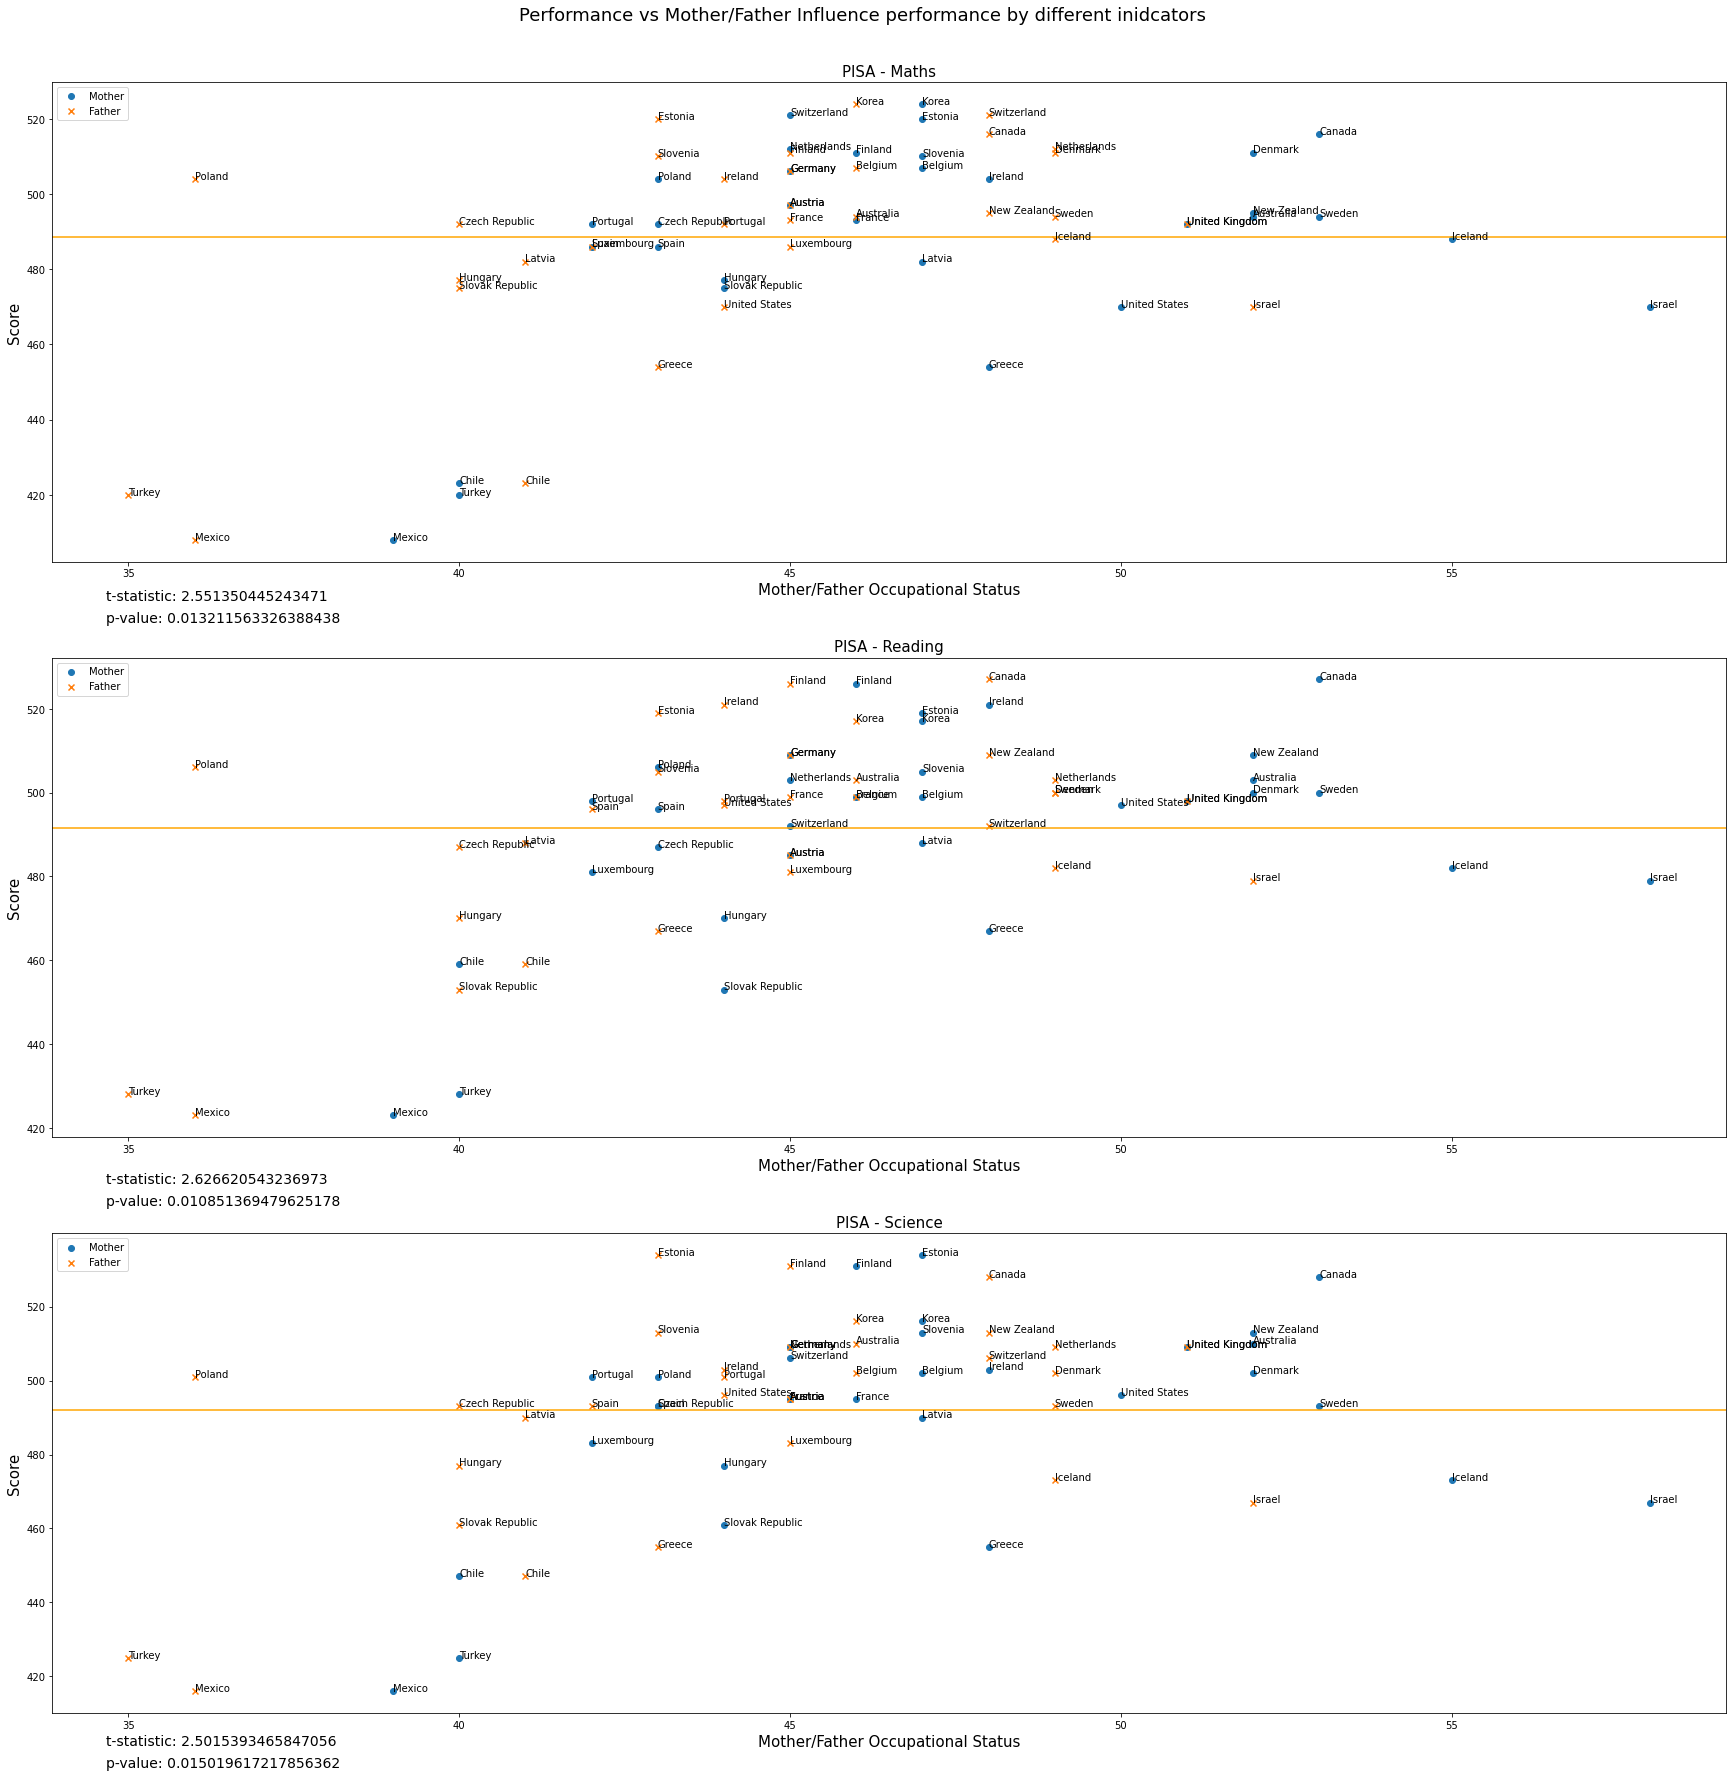

In [6]:
fig = plt.figure(figsize = (30, 30))
country = df['LOCATION']
t_list = []
p_list = []

indicators = ['MATHEMATICS', 'READING', 'SCIENCE']
titles = ["PISA - Maths", "PISA - Reading", "PISA - Science"] # titles of 3 subplots
for i in range(len(indicators)):
    # extract column with the target indicator    
    y = df[indicators[i]]
    x1 = df["MOTHER"]
    x2 = df["FATHER"]
    
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    # markers can be 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'.
    ax.scatter(x1, y, label = "Mother", marker='o')
    ax.scatter(x2, y, label = "Father",  marker='x')
    
    ax.set_xlabel("Mother/Father Occupational Status", fontsize = 15)
    ax.set_ylabel("Score", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    plt.axhline(np.mean(y), color = "orange")
    
    # put country annotations
    for ind, txt in enumerate(country):
        ax.annotate(txt, (x1[ind], y[ind]))
    for ind, txt in enumerate(country):
        ax.annotate(txt, (x2[ind], y[ind]))
    
    (t_stats, p_value) = stats.ttest_ind(x1/y, x2/y)
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Performance vs Mother/Father Influence performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)

In [7]:
### As shown by the p-values, which are all less than 0.05,  the differences is not clear. This is maybe due to outliers or randomness of the dataset. As such, we use binning to investigate further for a clearer trend. Scores are grouped by bins of occupational status.
K = 6
def Kbins(data, K):
    result = []
    min_val = min(data)
    max_val = max(data)
    width = max_val - min_val
    for val in data:
        normalized_score =(val-min_val) * (K-1) / width + 1
        result.append(round(normalized_score))
    return result
df['MOTHER_BIN'] = Kbins(df['MOTHER'], 6)
df['FATHER_BIN'] =  Kbins(df['FATHER'], 6)
mother = df.groupby('MOTHER_BIN').mean()
father = df.groupby('FATHER_BIN').mean()
# y1 = mother[indicators[i]]
# y2 = father[indicators[i]]

Text(0.15, 0.1, 'p-value: 0.9802436021437173')

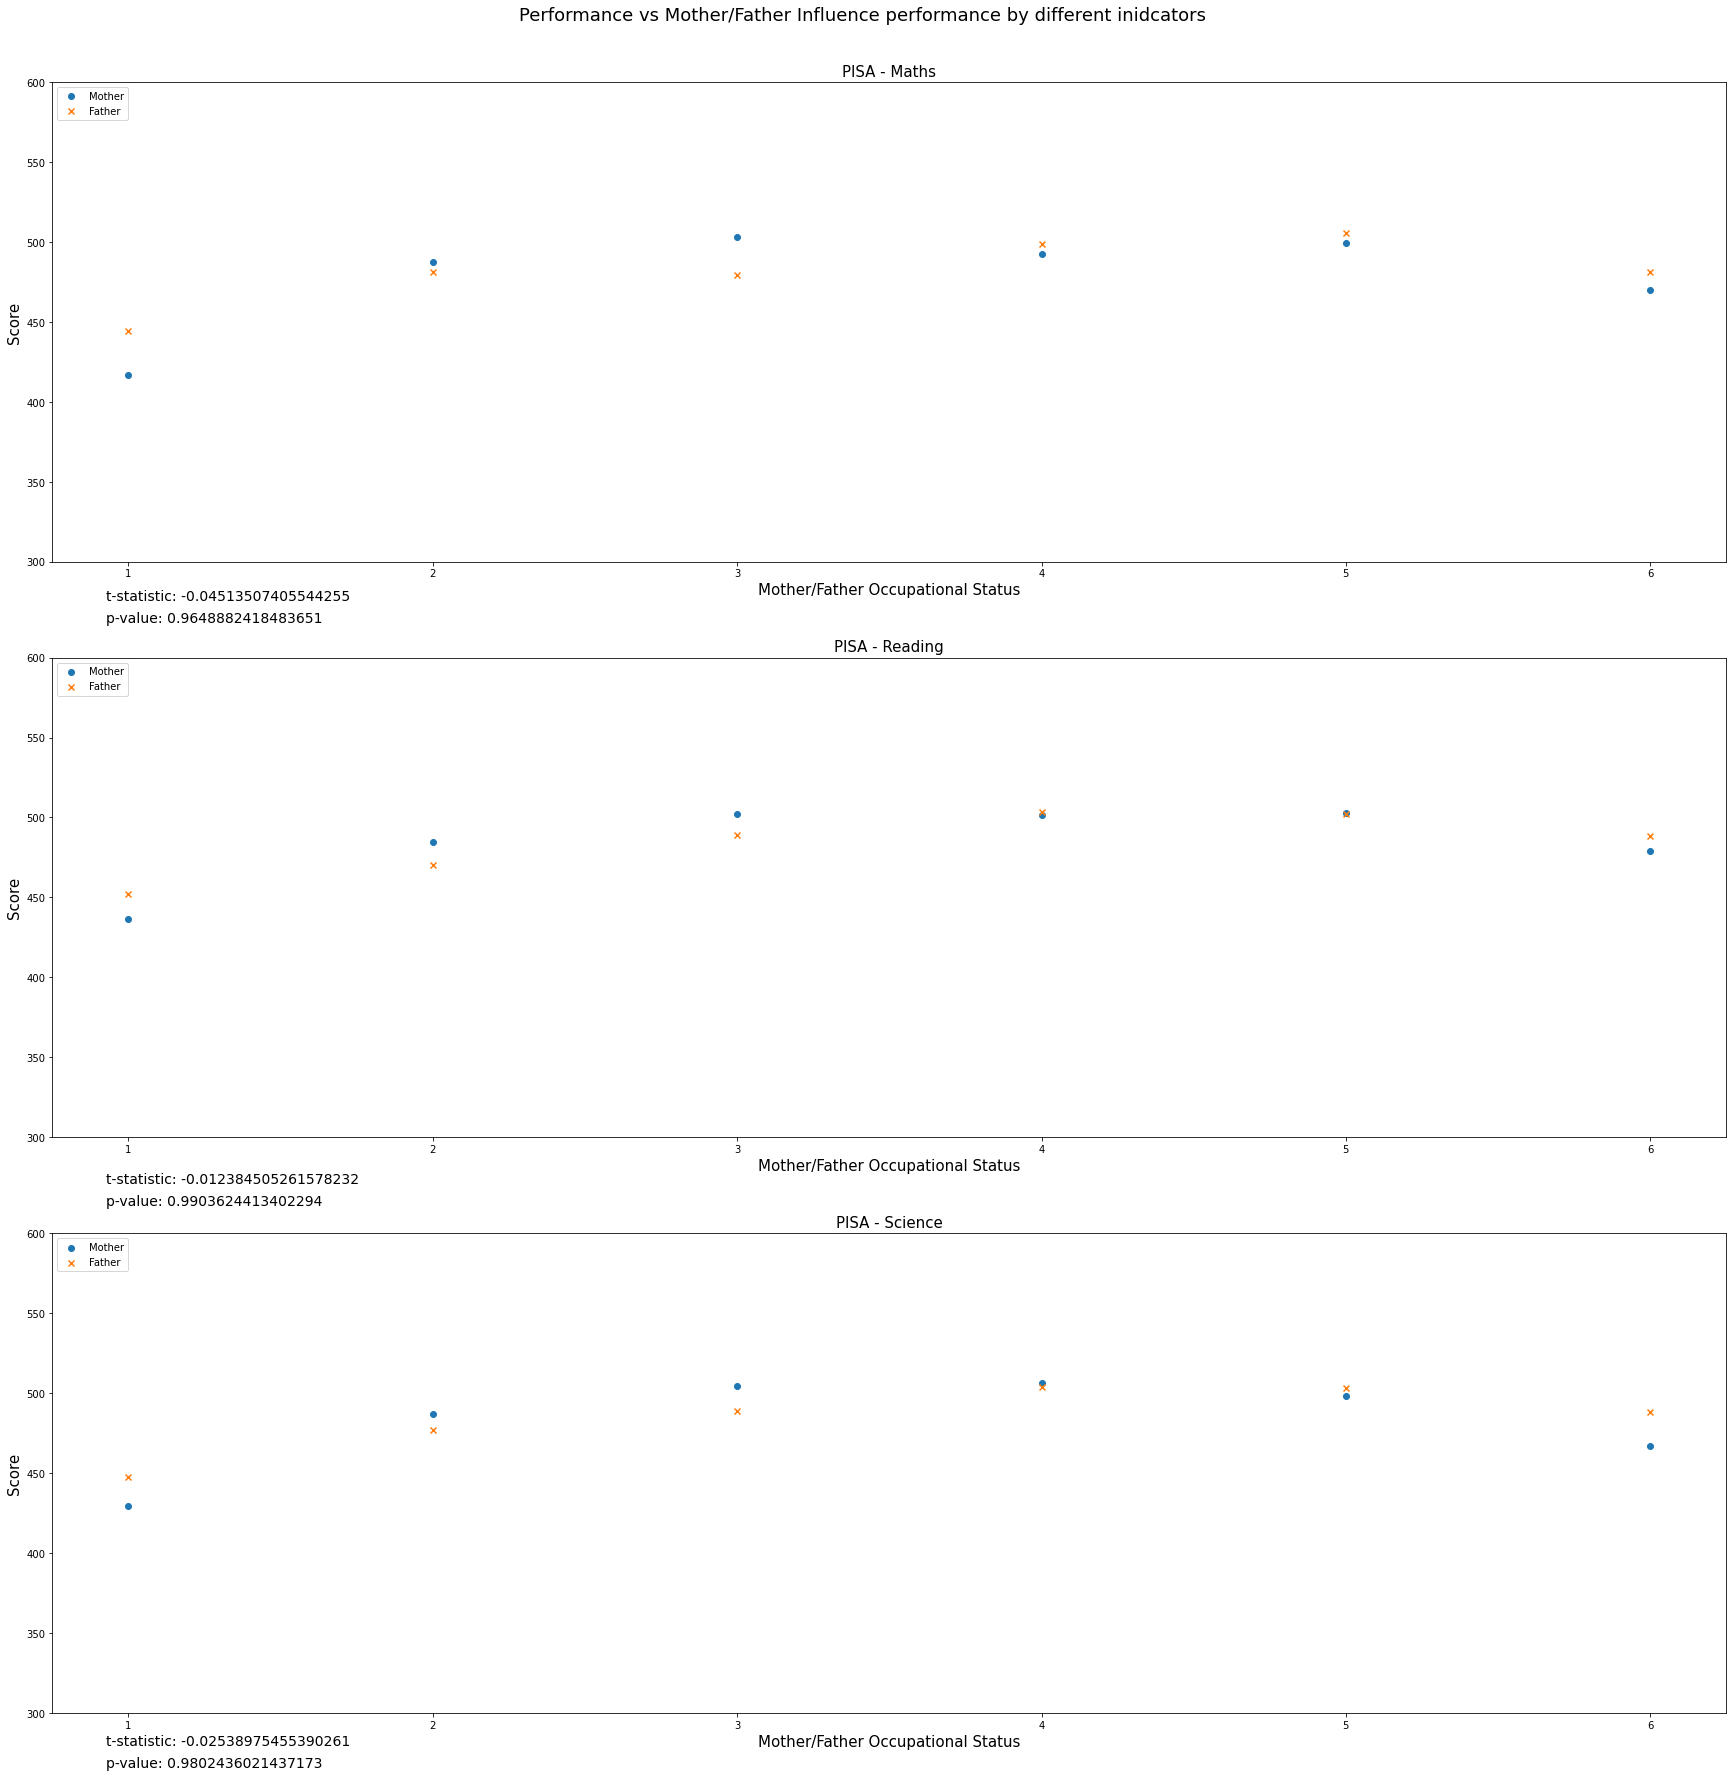

In [8]:

fig = plt.figure(figsize = (30, 30))
indicators = ['MATHEMATICS', 'READING', 'SCIENCE']
titles = ["PISA - Maths", "PISA - Reading", "PISA - Science"] # titles of 3 subplots

t_list = []
p_list = []
for i in range(len(indicators)):
    # extract column with the target indicator    
    x = range(1, K+1)
    y1 = mother[indicators[i]]
    y2 = father[indicators[i]]
    # print(len(x), len(y1))
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    # 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'.
    ax.scatter(x, y1, label = "Mother", marker='o')
    ax.scatter(x, y2, label = "Father",  marker='x')
    ax.set_ylim([300,600])
    ax.set_xlabel("Mother/Father Occupational Status", fontsize = 15)
    ax.set_ylabel("Score", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    plt.axhline(np.mean(x), color = "orange")
    
    (t_stats, p_value) = stats.ttest_ind(y1/x, y2/x)
    
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Performance vs Mother/Father Influence performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)

# Whether family influence more than teacher-ratio? 
### We want to figure out whether family differences influence score in different indicators more than differences in teachers.

# Compute z- scores for influential facors
### Since the values in the occupational status are in a small range, we decided to use the ùëç-score for the influential factors, which is standardised score assuming normal distribution

In [9]:
def z_score(df):
    df.columns = [x + "_zscore" for x in df.columns.tolist()]
    return (df - df.mean())/df.std(ddof=0)
factors =  df.iloc[:, [5, 6, 7, 8]].astype(float)
z_scores = z_score(factors)
print("üôâ --------------------- the z_scores ----------------------- üôâ")
z_scores

üôâ --------------------- the z_scores ----------------------- üôâ


MOTHER_zscore  FATHER_zscore  TEACHER_RATIO_zscore  TEACHER_DEGREE_zscore
0        1.140374       0.404520             -0.080951              -0.944520
1       -0.407770       0.164804             -0.339995               0.595807
2        0.034557       0.404520             -1.117125              -0.088783
3        1.361538       0.883951              0.696179              -0.807602
4       -1.513588      -0.794058              1.991397              -1.081438
5       -0.850097      -1.033773             -0.080951               1.588462
6        1.140374       1.123666             -0.080951              -1.218356
7        0.034557      -0.314627             -0.339995               1.177709
8       -0.186607       0.164804             -0.858082               1.725380
9       -0.186607       0.164804             -0.339995              -0.020324
10      -0.407770       0.164804              0.437136               1.417315
11       0.255720      -0.314627             -0.858082              -0.807602
12      -0.628934      -1.033773             -0.858082               0.938102
13       1.803865       1.123666             -0.858082              -1.081438
14       0.255720      -0.074911              0.178092              -0.670684
15       2.467356       1.842813             -0.339995              -0.123012
16       0.034557       0.404520              0.437136              -0.191471
17       0.034557      -0.794058             -0.858082               0.424660
18      -1.071261       0.164804             -0.858082               1.314626
19      -1.734751      -1.992635              3.804702              -0.670684
20      -0.407770       1.123666              1.732353              -0.773373
21       1.140374       0.883951              0.437136              -0.876061
22      -0.850097      -1.992635             -1.117125               1.828069
23      -1.071261      -0.074911             -0.599038              -1.047209
24      -0.628934      -1.033773             -0.080951               1.793839
25       0.034557      -0.314627             -0.599038              -1.149897
26      -0.850097      -0.554342             -0.080951              -0.602225
27       1.361538       1.123666             -0.599038               0.150824
28      -0.407770       0.883951             -0.339995               0.698496
29      -1.513588      -2.232351              0.437136              -0.944520
30       0.919211       1.603097              0.437136              -0.876061
31       0.698047      -0.074911              0.696179               0.321971

In [10]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def normalize(data):
    result = []
    min_val = min(data)
    max_val = max(data)
    for val in data:
        normalized_score =(val-min_val) * 100 / (max_val - min_val)
        result.append(round(normalized_score))
    return result

# compute sum for family factors and teacher factors, and then normalize the sums
family = (z_scores['MOTHER_zscore'] + z_scores['FATHER_zscore']).apply(sigmoid)
df['FAMILY'] = normalize(family) 
teacher = (z_scores['TEACHER_RATIO_zscore'] + z_scores['TEACHER_DEGREE_zscore']).apply(sigmoid)
df['TEACHER'] = normalize(teacher) 

In [11]:
df

LOCATION    REGION  MATHEMATICS  READING  SCIENCE  MOTHER  FATHER  \
0         Australia   Oceania          494      503      510      52      46   
1           Austria    Europe          497      485      495      45      45   
2           Belgium    Europe          507      499      502      47      46   
3            Canada  Americas          516      527      528      53      48   
4             Chile  Americas          423      459      447      40      41   
5    Czech Republic    Europe          492      487      493      43      40   
6           Denmark    Europe          511      500      502      52      49   
7           Estonia    Europe          520      519      534      47      43   
8           Finland    Europe          511      526      531      46      45   
9            France    Europe          493      499      495      46      45   
10          Germany    Europe          506      509      509      45      45   
11           Greece    Europe          454      467      455      48      43   
12          Hungary    Europe          477      470      477      44      40   
13          Iceland    Europe          488      482      473      55      49   
14          Ireland    Europe          504      521      503      48      44   
15           Israel      Asia          470      479      467      58      52   
16            Korea      Asia          524      517      516      47      46   
17           Latvia    Europe          482      488      490      47      41   
18       Luxembourg    Europe          486      481      483      42      45   
19           Mexico  Americas          408      423      416      39      36   
20      Netherlands    Europe          512      503      509      45      49   
21      New Zealand   Oceania          495      509      513      52      48   
22           Poland    Europe          504      506      501      43      36   
23         Portugal    Europe          492      498      501      42      44   
24  Slovak Republic    Europe          475      453      461      44      40   
25         Slovenia    Europe          510      505      513      47      43   
26            Spain    Europe          486      496      493      43      42   
27           Sweden    Europe          494      500      493      53      49   
28      Switzerland    Europe          521      492      506      45      48   
29           Turkey      Asia          420      428      425      40      35   
30   United Kingdom    Europe          492      498      509      51      51   
31    United States  Americas          470      497      496      50      44   

    TEACHER_RATIO  TEACHER_DEGREE  MOTHER_BIN  FATHER_BIN  FAMILY  TEACHER  
0              13            0.13           4           4      83       17  
1              12            0.58           3           4      43       53  
2               9            0.38           3           4      61       13  
3              16            0.17           5           5      91       42  
4              21            0.09           1           3       7       71  
5              13            0.87           2           2      11       83  
6              13            0.05           4           5      92       11  
7              12            0.75           3           3      42       69  
8              10            0.91           3           4      49       69  
9              12            0.40           3           4      49       34  
10             15            0.82           3           4      43       89  
11             10            0.17           3           3      48        4  
12             10            0.68           2           2      14       47  
13             10            0.09           5           5      96        0  
14             14            0.21           3           4      54       30  
15             12            0.37           6           6     100       31  
16             15            0.35           3           4    

Text(0.15, 0.1, 'p-value: 0.9802436021437173')

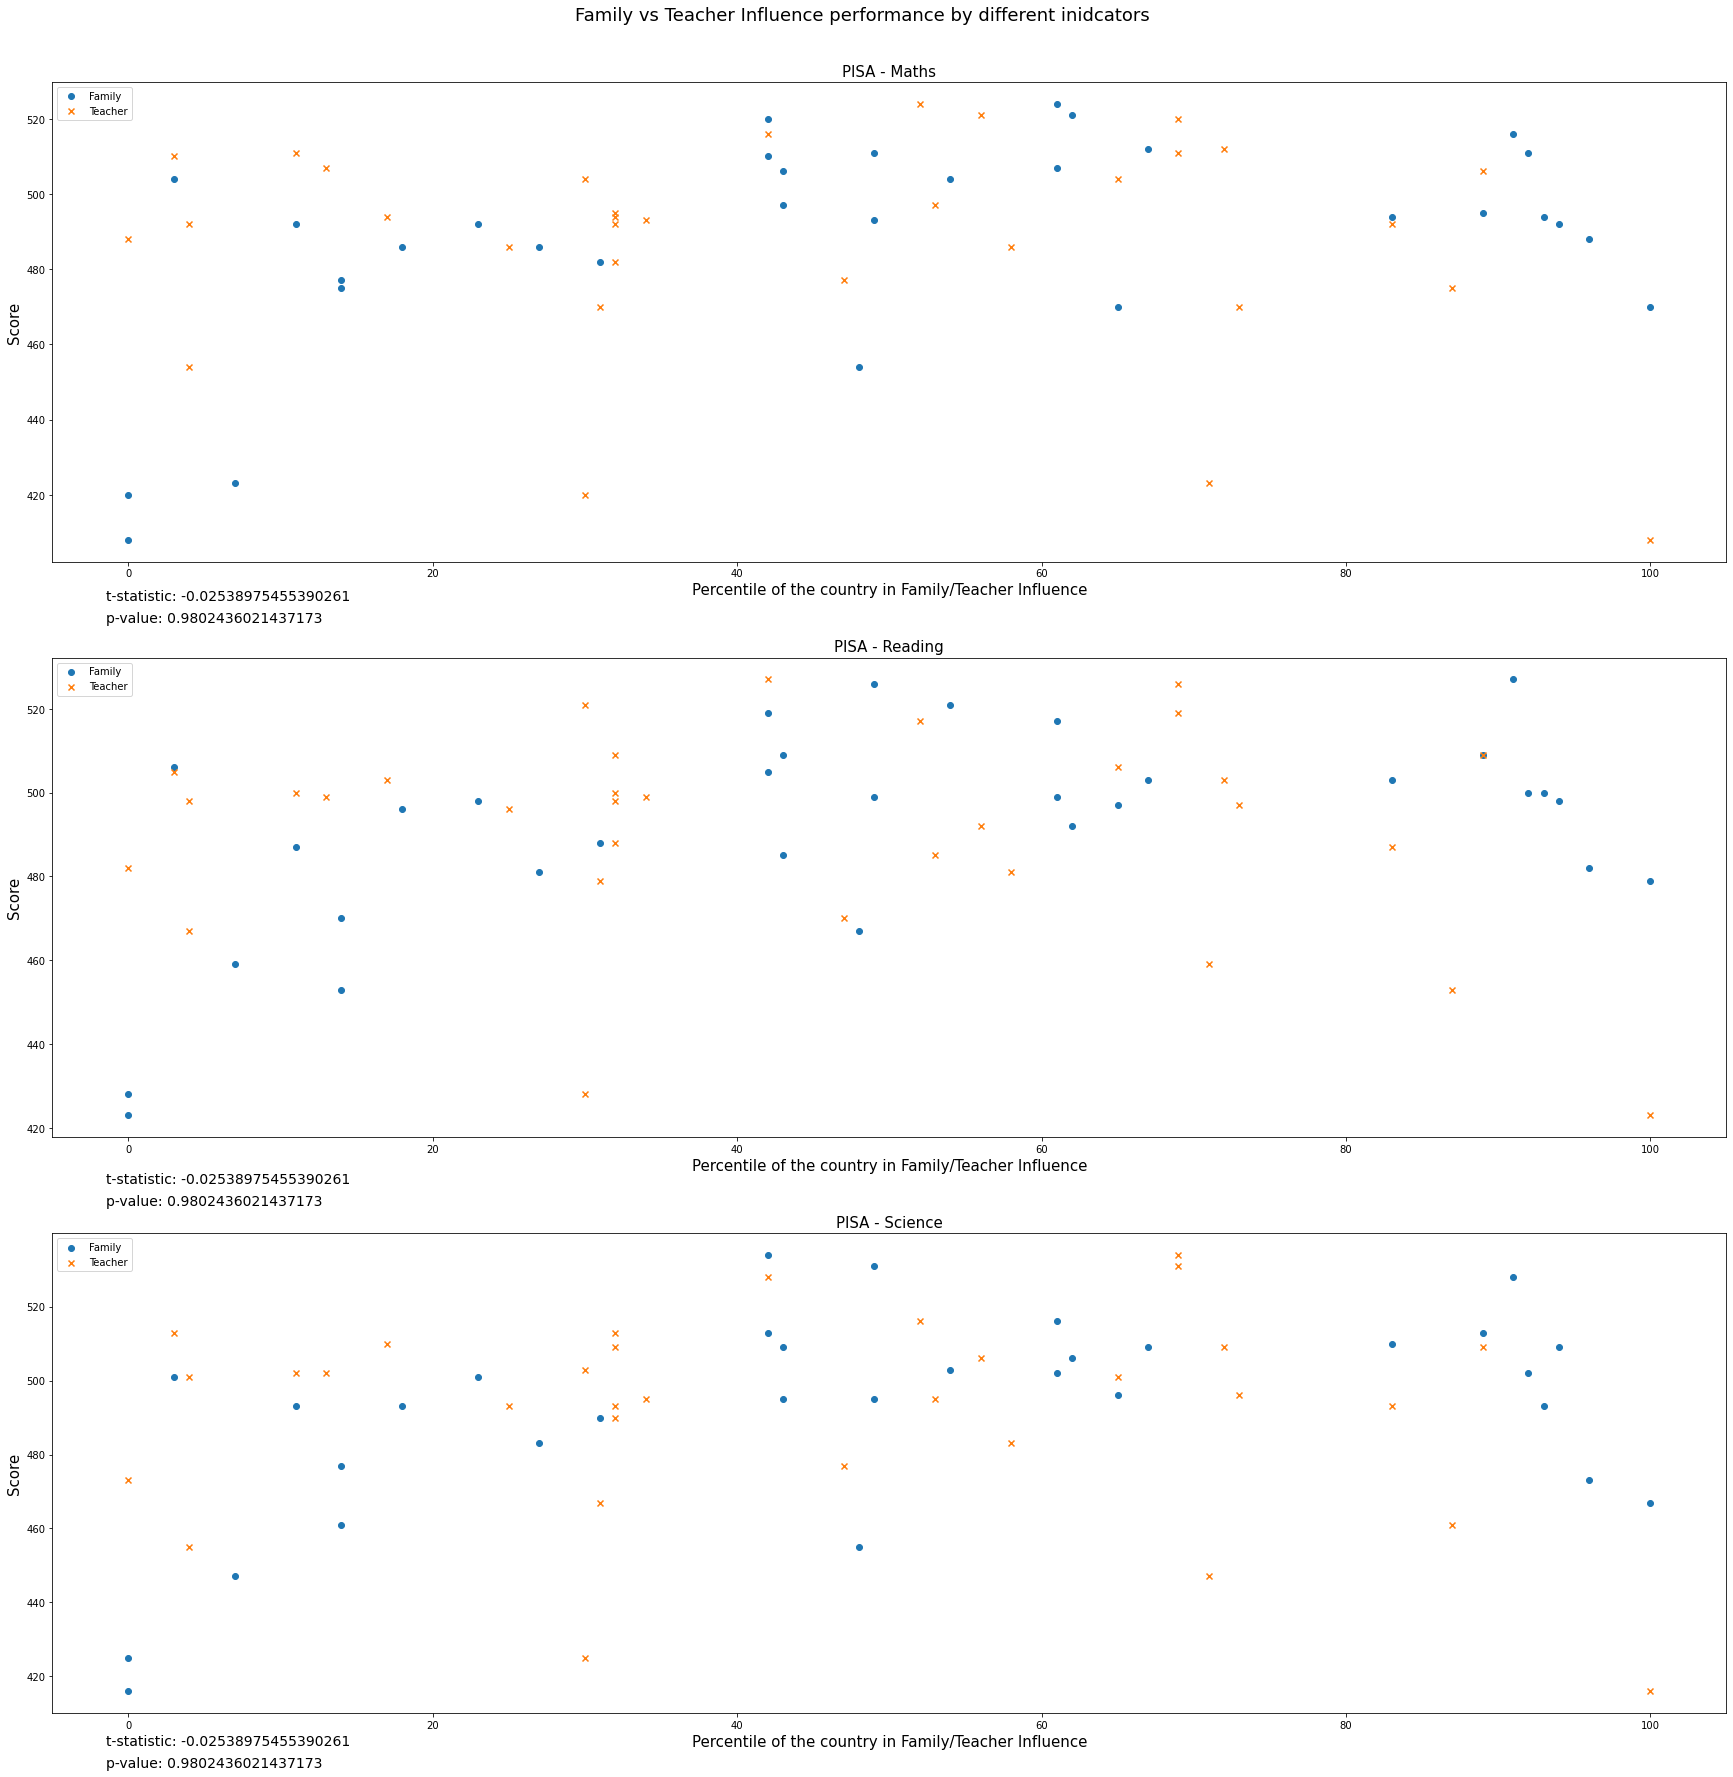

In [12]:
fig = plt.figure(figsize = (30, 30))
indicators = ['MATHEMATICS', 'READING', 'SCIENCE']
titles = ["PISA - Maths", "PISA - Reading", "PISA - Science"] # titles of 3 subplots
t_list = []
p_list = []
for i in range(len(indicators)):
    # extract column with the target indicator    
    y = df[indicators[i]]
    x1 = df["FAMILY"]
    x2 = df["TEACHER"]
    
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    # 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'.
    ax.scatter(x1, y, label = "Family", marker='o')
    ax.scatter(x2, y, label = "Teacher",  marker='x')
    
    #plt.xticks(df['LOCATION'])
    ax.set_xlabel("Percentile of the country in Family/Teacher Influence", fontsize = 15)
    ax.set_ylabel("Score", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    
    (t_stats, p_value) = stats.ttest_ind(y1/x, y2/x)
    
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Family vs Teacher Influence performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)



Text(0.15, 0.1, 'p-value: 0.9802436021437173')

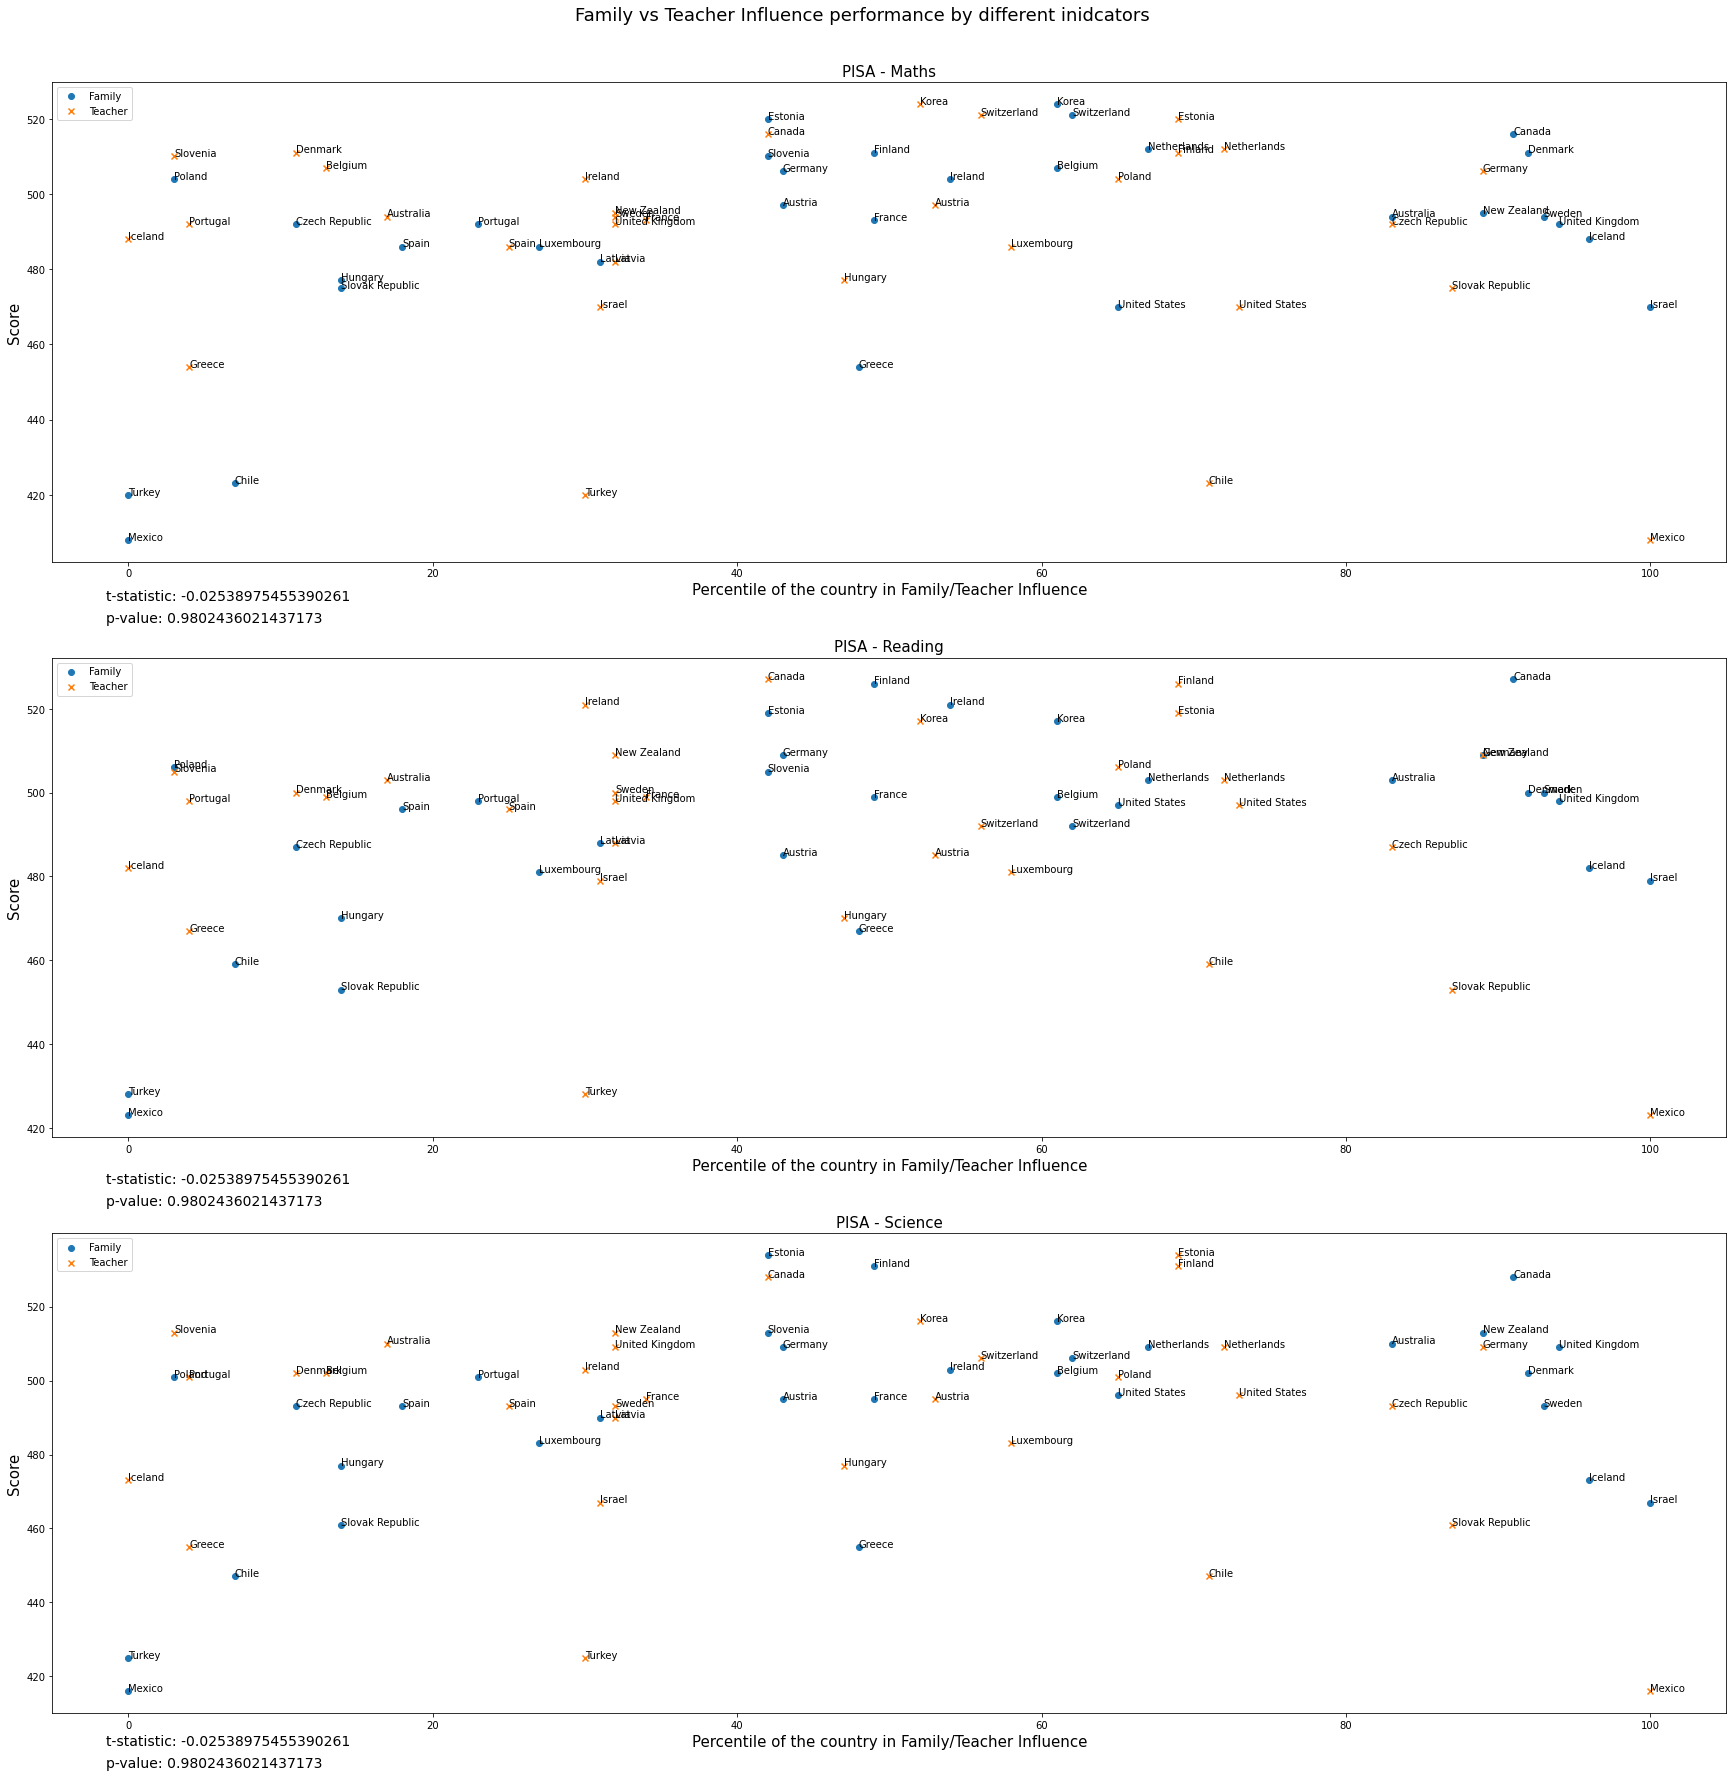

In [13]:
fig = plt.figure(figsize = (30, 30))
t_list = []
p_list = []
for i in range(len(indicators)):
    # extract column with the target indicator    
    y = df[indicators[i]]
    x1 = df["FAMILY"]
    x2 = df["TEACHER"]
    
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    # 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'.
    ax.scatter(x1, y, label = "Family", marker='o')
    ax.scatter(x2, y, label = "Teacher",  marker='x')
    for ind, txt in enumerate(country):
        ax.annotate(txt, (x1[ind], y[ind]))
    for ind, txt in enumerate(country):
        ax.annotate(txt, (x2[ind], y[ind]))
    
    #plt.xticks(df['LOCATION'])
    ax.set_xlabel("Percentile of the country in Family/Teacher Influence", fontsize = 15)
    ax.set_ylabel("Score", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    
    (t_stats, p_value) = stats.ttest_ind(y1/x, y2/x)
    
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Family vs Teacher Influence performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)


